In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)
# plt.rcParams['axes.unicode_minus'] = False


from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [10]:
from google.colab import drive
drive.mount('/content/drive')
sanga_path ='/content/drive/My Drive/상가정보_부산_코드구분.csv'
# sanga_path = f'data/상가정보_부산_코드구분.csv'
sanga_raw = pd.read_csv(sanga_path, encoding='cp949')
sel_rows = sanga_raw.index[sanga_raw['구분코드']!='0']
sanga_data = sanga_raw.loc[sel_rows]
sanga_data.head()

ModuleNotFoundError: No module named 'google'

* 구분코드 y1 : 편의점, y2 : 대형마트, y3 : 슈퍼마켓(기타)

In [12]:
select_col = sanga_data[['시군구명', '행정동명', '상호명', '구분코드']]
select_col.head()

,시군구명,행정동명,상호명,구분코드
5,동구,초량6동,경부할인마트,y3
91,사상구,엄궁동,롯데캐슬리버,y3
136,사하구,하단2동,코리아세븐하단제휴점,y3
185,사하구,하단1동,삼일슈퍼,y3
202,해운대구,중1동,GS25해운리베라,y1


In [13]:
sel_row1 = select_col.index[select_col['구분코드']=='y1']
sel_row2 = select_col.index[select_col['구분코드']=='y2']
sel_row3 = select_col.index[select_col['구분코드']=='y3']
conv_data = select_col.loc[sel_row1]
mart_data = select_col.loc[sel_row2]
sup_data = select_col.loc[sel_row3]      

In [14]:
conv_data[conv_data['행정동명']=='장전1동']

,시군구명,행정동명,상호명,구분코드
22377,금정구,장전1동,세븐일레븐,y1
22520,금정구,장전1동,미니스톱,y1
53881,금정구,장전1동,GS25장전대동점,y1
57289,금정구,장전1동,세븐일레븐,y1
87571,금정구,장전1동,CU,y1
91297,금정구,장전1동,CU,y1
93633,금정구,장전1동,CU장전삼광점,y1
105011,금정구,장전1동,세븐일레븐부산장전온천점,y1
107457,금정구,장전1동,GS25부대제일점,y1
108096,금정구,장전1동,CU,y1


In [15]:
conv_data.head()

,시군구명,행정동명,상호명,구분코드
202,해운대구,중1동,GS25해운리베라,y1
247,해운대구,반송2동,미니스톱반송삼한점,y1
253,사상구,학장동,GS25,y1
329,사하구,당리동,GS25당리행운점,y1
553,금정구,부곡2동,GS25부곡점,y1


In [16]:
mart_data.head()

,시군구명,행정동명,상호명,구분코드
635,부산진구,전포1동,홈플러스,y2
710,부산진구,부암1동,롯데마트,y2
844,연제구,연산9동,홈플러스익스프레스토곡점,y2
2134,기장군,기장읍,탑마트기장점,y2
2471,사하구,당리동,농협하나로마트,y2


In [17]:
sup_data.head()

,시군구명,행정동명,상호명,구분코드
5,동구,초량6동,경부할인마트,y3
91,사상구,엄궁동,롯데캐슬리버,y3
136,사하구,하단2동,코리아세븐하단제휴점,y3
185,사하구,하단1동,삼일슈퍼,y3
243,북구,화명1동,삼한할인슈퍼,y3


* 다른 데이터와 병합을 위해 행정동명의 순서 일치시킨다. 

In [18]:
hjdong = ['중앙동', '동광동', '대청동', '보수동', '부평동', '광복동', '남포동', '영주1동', '영주2동',
       '동대신제1동', '동대신제2동', '동대신제3동', '서대신제1동', '서대신제3동', '서대신제4동', '부민동',
       '아미동', '초장동', '충무동', '남부민제1동', '남부민제2동', '암남동', '초량1동', '초량2동',
       '초량3동', '초량6동', '수정1동', '수정2동', '수정4동', '수정5동', '범일1동', '범일2동',
       '범일5동', '남항동', '영선제1동', '영선제2동', '신선동', '봉래제1동', '봉래제2동', '청학제1동',
       '청학제2동', '동삼제1동', '동삼제2동', '동삼제3동', '부전제1동', '부전제2동', '연지동', '초읍동',
       '양정제1동', '양정제2동', '전포제1동', '전포제2동', '부암제1동', '부암제3동', '당감제1동',
       '당감제2동', '당감제4동', '가야제1동', '가야제2동', '개금제1동', '개금제2동', '개금제3동',
       '범천제1동', '범천제2동', '수민동', '복산동', '명륜동', '온천제1동', '온천제2동', '온천제3동',
       '사직제1동', '사직제2동', '사직제3동', '안락제1동', '안락제2동', '명장제1동', '명장제2동',
       '대연1동', '대연3동', '대연4동', '대연5동', '대연6동', '용호1동', '용호2동', '용호3동',
       '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현1동', '문현2동', '문현3동',
       '문현4동', '구포제1동', '구포제2동', '구포제3동', '금곡동', '화명제1동', '화명제2동',
       '화명제3동', '덕천제1동', '덕천제2동', '덕천제3동', '만덕제1동', '만덕제2동', '만덕제3동',
       '우제1동', '우제2동', '중제1동', '중제2동', '좌제1동', '좌제2동', '좌제3동', '좌제4동',
       '송정동', '반여제1동', '반여제2동', '반여제3동', '반여제4동', '반송제1동', '반송제2동',
       '재송제1동', '재송제2동', '괴정1동', '괴정2동', '괴정3동', '괴정4동', '당리동', '하단1동',
       '하단2동', '신평1동', '신평2동', '장림1동', '장림2동', '다대1동', '다대2동', '구평동',
       '감천1동', '감천2동', '서1동', '서2동', '서3동', '부곡1동', '부곡2동', '부곡3동',
       '부곡4동', '장전1동', '장전2동', '장전3동', '선두구동', '청룡노포동', '남산동', '구서1동',
       '구서2동', '금성동', '대저1동', '대저2동', '강동동', '가락동', '녹산동', '가덕도동', '거제1동',
       '거제2동', '거제3동', '거제4동', '연산1동', '연산2동', '연산3동', '연산4동', '연산5동',
       '연산6동', '연산8동', '연산9동', '남천1동', '남천2동', '수영동', '망미1동', '망미2동',
       '광안1동', '광안2동', '광안3동', '광안4동', '민락동', '삼락동', '모라1동', '모라3동',
       '덕포1동', '덕포2동', '괘법동', '감전동', '주례1동', '주례2동', '주례3동', '학장동', '엄궁동',
       '기장읍', '장안읍', '일광면', '철마면']

* 각 행정동 별 사업체 갯수 출력 

In [19]:
num_conv = []
num_mart = []
num_sup = []

for i in hjdong :
    sel_dong1 = conv_data.index[conv_data['행정동명']==i]
    sel_dong2 = mart_data.index[mart_data['행정동명']==i]
    sel_dong3 = sup_data.index[sup_data['행정동명']==i]
    num_conv.append(len(conv_data.loc[sel_dong1]))
    num_mart.append(len(mart_data.loc[sel_dong2]))
    num_sup.append(len(sup_data.loc[sel_dong3]))
    

In [20]:
df = pd.DataFrame({"행정동명":hjdong , "편의점수":num_conv, "대형마트수":num_mart, "슈퍼마켓수":num_sup})
df['합계']=df['편의점수']+df['대형마트수']+df['슈퍼마켓수']
df
df.to_csv('/content/drive/My Drive/YPol/부산_읍면동별_경쟁업체수.csv', encoding='euc-kr')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/YPol/부산_읍면동별_경쟁업체수.csv'

In [41]:
df[df['행정동명']=='장전1동']

,행정동명,편의점수,대형마트수,슈퍼마켓수,합계
147,장전1동,3,0,0,3


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_

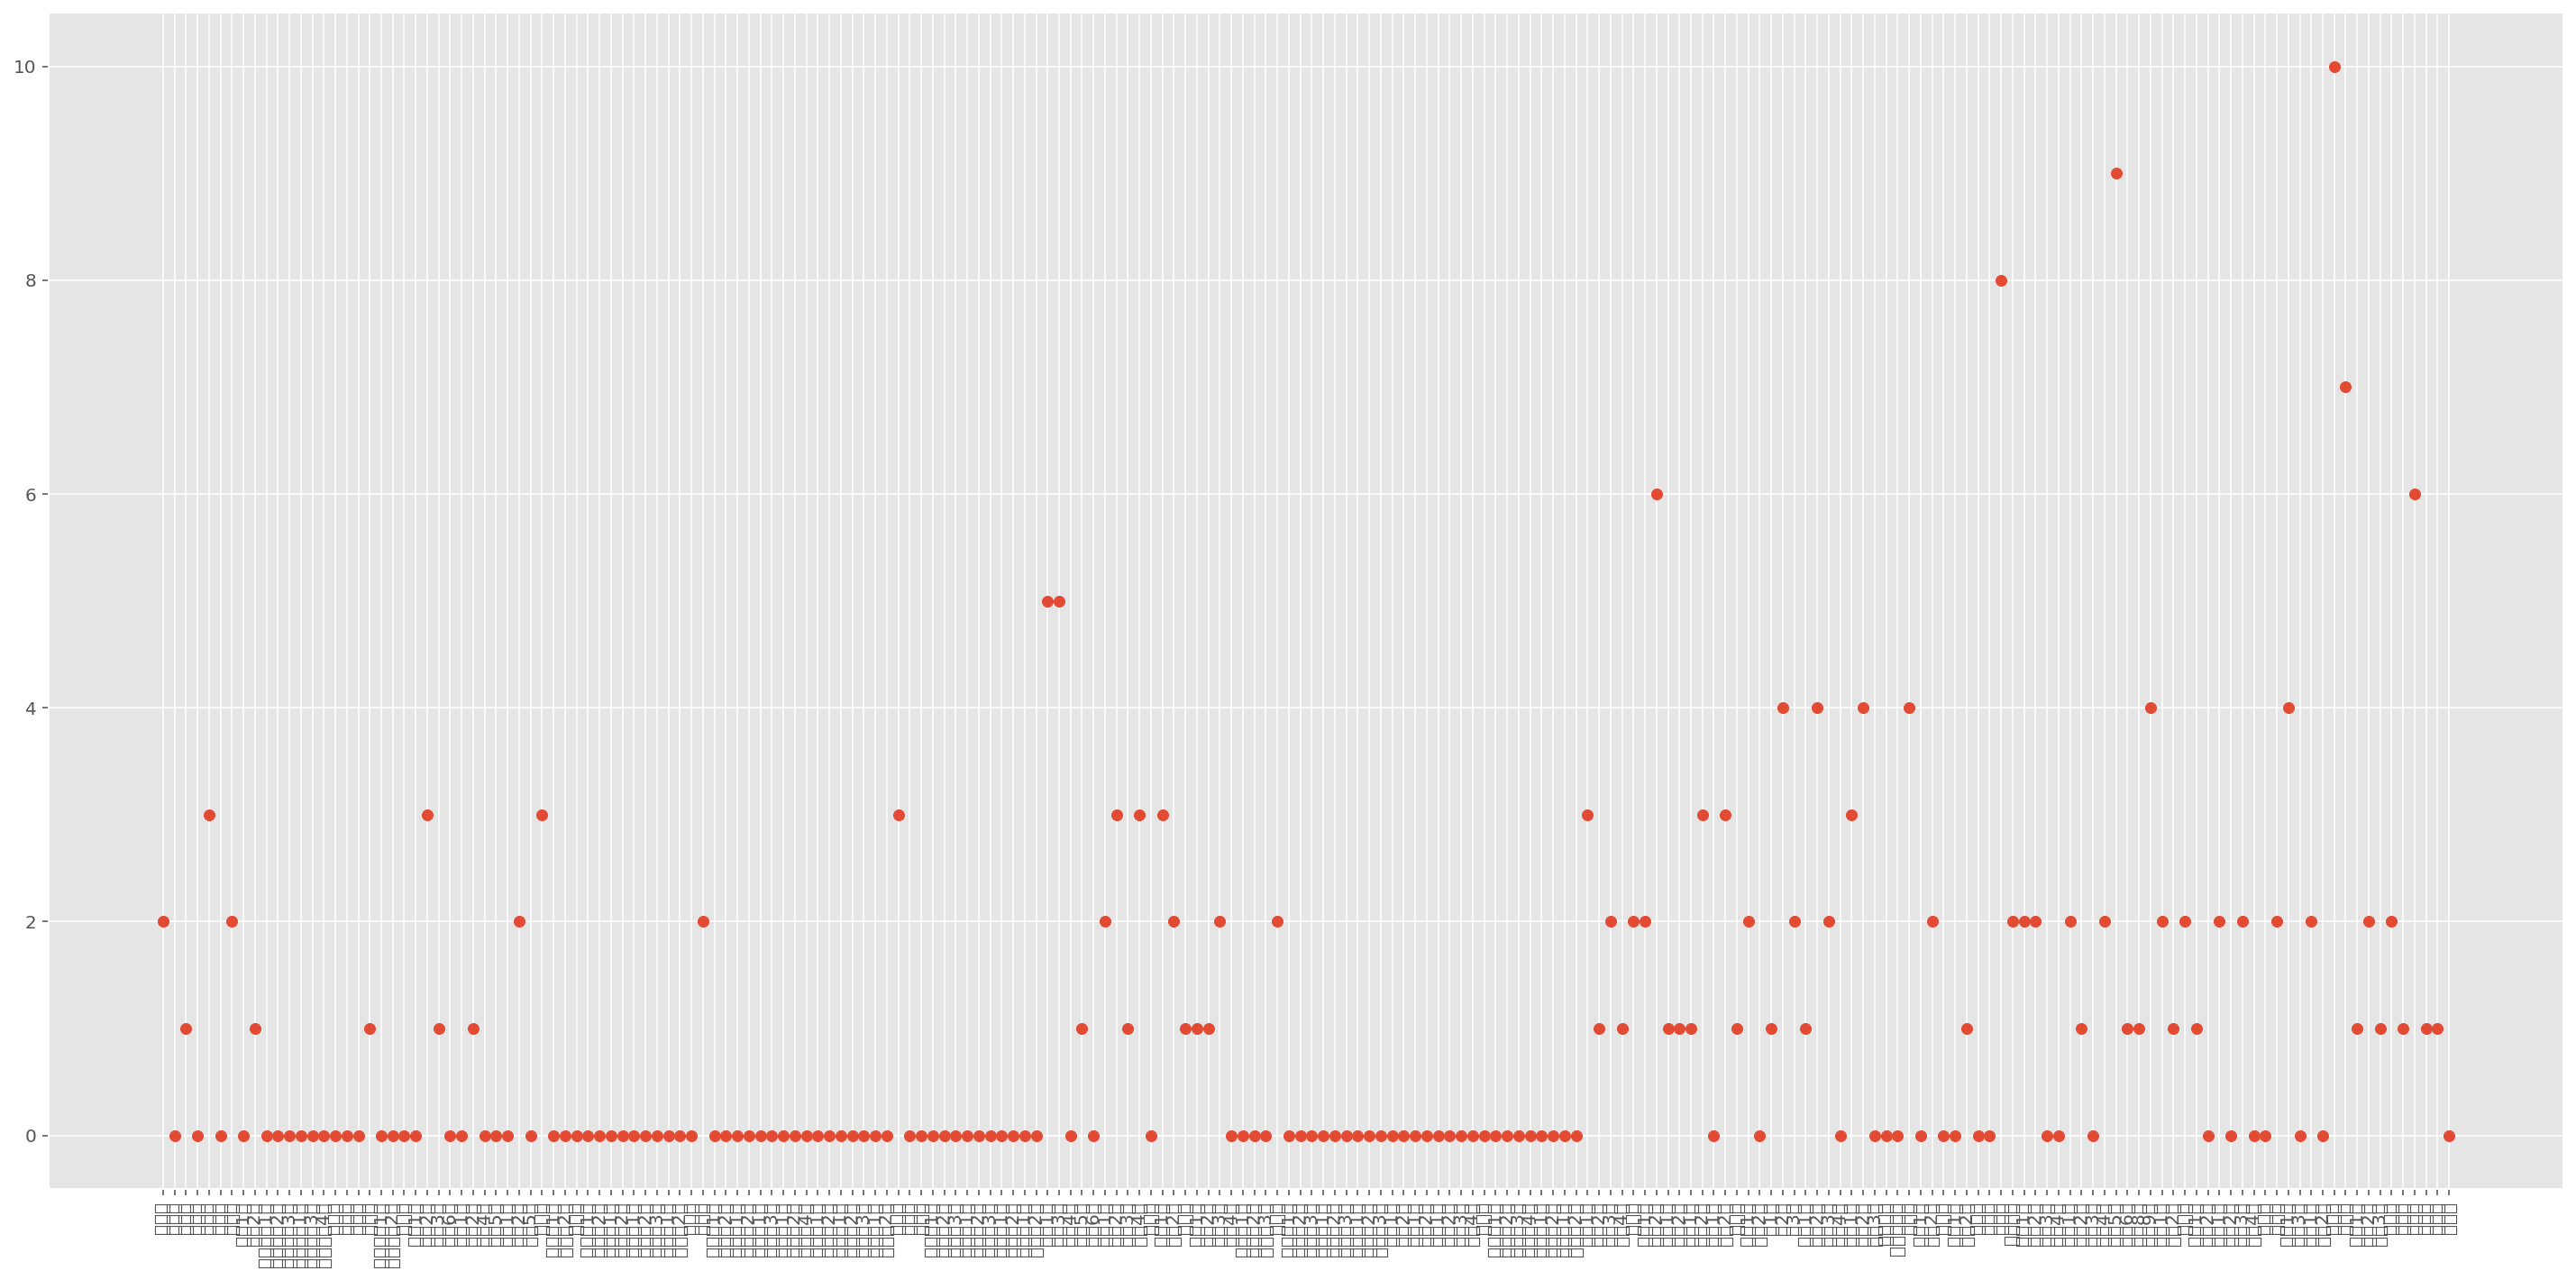

In [ ]:
x = df['행정동명']
y = df['합계']

plt.figure(figsize=(25,12))
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.grid(True)

plt.show();